# Weekly Activity (Tutorial 6)

## Directory

In [67]:
import os 
os.chdir("C:/Users/yichu/Desktop/yichun/UTAR/Y2S3/Mini Project/Week 6/Week 6")

In [68]:
%pwd

'C:\\Users\\yichu\\Desktop\\yichun\\UTAR\\Y2S3\\Mini Project\\Week 6\\Week 6'

## Setup

In [69]:
import sys
# Python 3.7 is required
assert sys.version_info >= (3,7)

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# For reproducibility,
np.random.seed(99)

# Make sure that optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)

cv.useOptimized()

True

## Exercise 1
Write a program to segment the boat and the people on it from the background. Follow the instruction below:
- Use 'boat.jpg' as input.
- Apply Otsu thresholding.
- Draw bounding box to identify the region where the boat and people are located.

In [27]:
img = cv.imread('boat.jpg')  
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Otsu's threshold after Gaussian filtering
blur = cv.GaussianBlur(gray, (5, 5), 0)   # the third argument here is standard deviation
ret, img_thres = cv.threshold(blur, 0, 255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

# Dilate mask to include the hat of the people
struc_ele = np.ones((5,5), dtype = np.uint8)
img_thres =cv.dilate(img_thres, struc_ele, iterations = 6)

In [28]:
fg_idx = cv.findNonZero(img_thres) # extract ROI
fg_idx_2D = fg_idx.reshape(-1, 2) # Reshape the mask to 2D array

# Determine min and max coordinate of the mask
coordinate_min = np.min(fg_idx_2D, axis = 0) # top left corner
coordinate_max = np.max(fg_idx_2D, axis = 0) # bottom right corner

# bounding box 
cv.rectangle(img, (coordinate_min[0], coordinate_min[1]), (coordinate_max[0], coordinate_max[1]), (255,0,0), 1, cv.LINE_AA)

# Display the result
cv.imshow('Bounding box', img)
cv.imshow('Threshold', img_thres)
cv.waitKey(0)
cv.destroyAllWindows()

## Exercise 2
Write a program to visualize the effect of size of structuring element on the morphological transformation (e.g. erosion, dilation, opening, and closing).

- Load the 'leaf.jfif' and perform thresholding to segment the leaf from the background.
- Create a GUI containing trackbar to control the size of structuring element and display the resulting image on a window alongside the trackbar.

In [5]:
img=cv.imread('leaf.jfif')

# perform thresholding to segment leaf from background
ret, img = cv.threshold(img, 200, 255, cv.THRESH_BINARY_INV)

# GUI
def trackbar(x):
    kernel=cv.getStructuringElement(cv.MORPH_ELLIPSE, (x,x))
    img1 = cv.morphologyEx(img,cv.MORPH_ERODE,kernel)
    img2 = cv.morphologyEx(img,cv.MORPH_DILATE,kernel)
    img3 = cv.morphologyEx(img,cv.MORPH_OPEN,kernel)
    img4 = cv.morphologyEx(img,cv.MORPH_CLOSE,kernel)
    cv.imshow('Morphological Transformation',np.hstack([img,img1,img2,img3,img4]))

    
cv.namedWindow('Morphological Transformation')
cv.createTrackbar('Range', 'Morphological Transformation', 15, 50, trackbar)

cv.waitKey(0)
cv.destroyAllWindows()

## Exercise 3
Apply the steps shown in exercise 4 to segment the porcelain from these images: "porcelain1.jfif" - "porcelain5.jfif".
- Import all porcelain images
- Perform colour segmentation
- Display the results 

In [70]:
# Load image
img = cv.imread('porcelain1.jfif')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)


In [71]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors

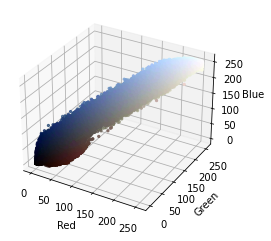

In [72]:
r, g, b = cv.split(img)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection = "3d")

# Normalize the color range
pixel_colors = img.reshape(img.shape[0] * img.shape[1], 3)
norm = colors.Normalize(vmin = 0., vmax = 1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(r.ravel(), g.ravel(), b.ravel(), facecolor = pixel_colors,
            marker = '.')
axis.set_xlabel('Red')
axis.set_ylabel('Green')
axis.set_zlabel('Blue')

plt.show()

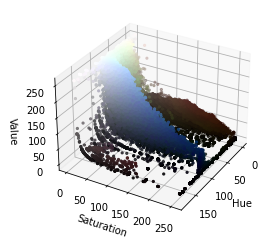

In [73]:
# convert image to HSV
img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)

h, s, v = cv.split(img_hsv)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection = "3d")

axis.scatter(h.ravel(), s.ravel(), v.ravel(), facecolors = pixel_colors,
            marker = ".")
axis.view_init(30, 30)
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")

plt.show()

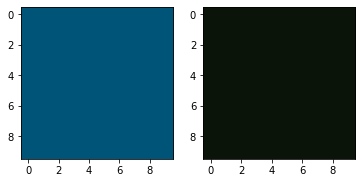

In [84]:
blue_low = (80, 130, 20)
blue_high = (140, 255, 120)

from matplotlib.colors import hsv_to_rgb

lo_square = np.full((10, 10, 3), blue_low, dtype = np.uint8)/255.0
do_square = np.full((10, 10, 3), blue_high, dtype = np.uint8)/255.0

plt.subplot(1,2,1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1,2,2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

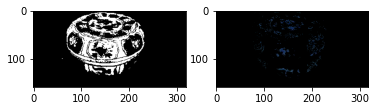

In [86]:
# Mask of blue colour on porcelain
mask_blue = cv.inRange(img_hsv, blue_low, blue_high)
res_blue = cv.bitwise_and(img, img, mask = mask_blue)

plt.subplot(1,2,1)
plt.imshow(mask, cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(res_blue)
plt.show()

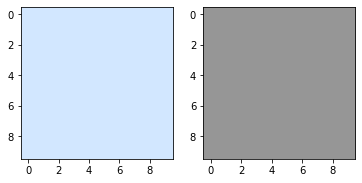

In [85]:
# we need to produce a mask for bright colours appear on the porcelain as well.
bright_low = (0, 0, 150)
bright_high = (150, 45, 255)

lo_square = np.full((10, 10, 3), bright_low, dtype = np.uint8)/255.0
do_square = np.full((10, 10, 3), bright_high, dtype = np.uint8)/255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1,2,2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

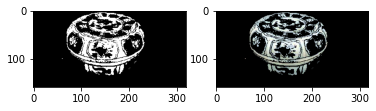

In [87]:
# Mask of bright colour on porcelain
mask_bright = cv.inRange(img_hsv, white_low, white_high)
res_bright = cv.bitwise_and(img, img, mask = mask_bright)

plt.subplot(1,2,1)
plt.imshow(mask, cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(res_bright)
plt.show()

In [78]:
# Finally, add both mask together to present the whole porcelain 

final_mask = cv.add(mask_blue, mask_bright)

## My function

In [146]:
def segment_porcelain(img): 
    
    
    # Perform image blurring to remove high frequency content from image
    img = cv.medianBlur(img, 5)
    
    # Convert RGB to HSV
    img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV) 
     
    # set blue color range 
    blue_low = (80, 130, 20)
    blue_high = (140, 255, 140)
    
    # set bright colour range 
    bright_low = (0, 0, 150)
    bright_high = (150, 45, 255)
     
    # Produce mask for blue colour
    mask_blue = cv.inRange(img_hsv, blue_low, blue_high)
    
    # Produce mask for bright colour
    mask_bright = cv.inRange(img_hsv, bright_low, bright_high)

    # Finally, add both mask together to present the whole porcelain 
    final_mask = cv.add(mask_blue, mask_bright)
    final_mask = cv.cvtColor(final_mask, cv.COLOR_GRAY2RGB)
    return final_mask
    
filename = "porcelain" 
 
porcelain_list = [] 
for i in range(1, 6): 
    
    img_porcelain = cv.imread(filename + str(i) + ".jfif") 
    porcelain = cv.cvtColor(img_porcelain, cv.COLOR_BGR2RGB) 
    porcelain_list.append(porcelain) 
 
results = [segment_porcelain(porcelain) for porcelain in porcelain_list]

for j in range(5):
    
    results[j] = cv.bitwise_and(porcelain_list[j], results[j])

In [136]:
porcelain_list[0].shape

(200, 300, 3)

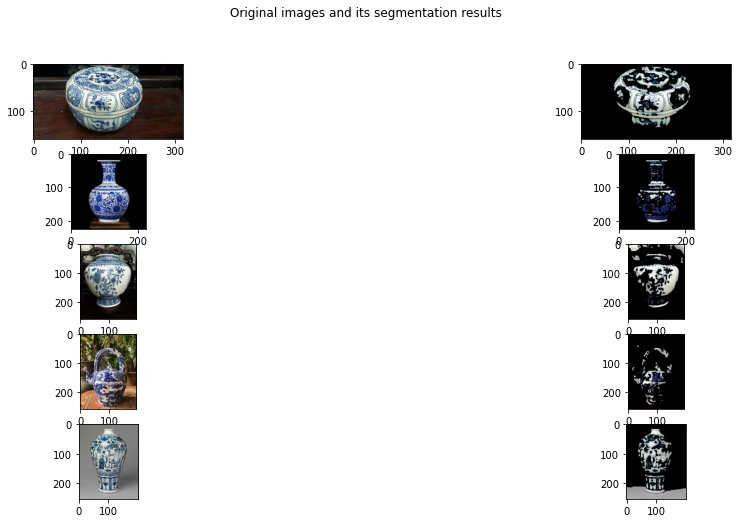

In [147]:
f, ax = plt.subplots(5, 2, figsize = (18, 8)) 
 
for i in range(5): 
    ax[i][0].imshow(porcelain_list[i]) 
    ax[i][1].imshow(results[i]) 
     
f.suptitle("Original images and its segmentation results") 

plt.show()